# **PRIMER PARCIAL**

 <h2>EJERCICIO R2 -> DATASET 143
 <h3>
  NOMBRE: Delgadillo LLanos Juan Sebastian <br>
  CARRERA: Ingenieria de Sistemas ( oyente )<BR>  
  
  * [Enlace al git hub](https://github.com/sebastianDLL/SIS420_IA/tree/main)
  
  * [Enlace al Colab](https://colab.research.google.com/drive/1l72BBWKbKFEzvw2zi6uLtO6_fOWXMZW4?usp=sharing)
 <h3>

# **Regresion Logistica - Clasificacion Binaria**

Conjunto de datos con todos los partidos de la NBA desde la temporada 2004 hasta diciembre 2020

Los datos que se conocen son: FG_PCT_home, FT_PCT_home, FG3_PCT_home, AST_home, REB_home, TEAM_ID_away, PTS_away, FG_PCT_away, FT_PCT_away, FG3_PCT_away, AST_away, REB_away, HOME_TEAM_WINS.

y = probabilidad si el equipo del BNA ganó partidos de local Si=1 No=0


In [19]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [20]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Leemos el Dataset

In [ ]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/SIS420/PrimerParcial/gamesDataset.csv', delimiter=',')

# Mostramos los datos
data

# PRAPARAMOS EL DATASET

In [ ]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

soltamos las columnas innecesarias para el analisis

In [23]:
# Descartamos las columnas que tienen muchos datos perdidos o que no son muy necesarios para el análisis
data.drop(['GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'TEAM_ID_home', 'TEAM_ID_away'], axis=1, inplace=True)

convertimos las columnas de tipo object a int64

In [24]:
#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GAME_DATE_EST   26651 non-null  int64  
 1   SEASON          26651 non-null  int64  
 2   PTS_home        26552 non-null  float64
 3   FG_PCT_home     26552 non-null  float64
 4   FT_PCT_home     26552 non-null  float64
 5   FG3_PCT_home    26552 non-null  float64
 6   AST_home        26552 non-null  float64
 7   REB_home        26552 non-null  float64
 8   PTS_away        26552 non-null  float64
 9   FG_PCT_away     26552 non-null  float64
 10  FT_PCT_away     26552 non-null  float64
 11  FG3_PCT_away    26552 non-null  float64
 12  AST_away        26552 non-null  float64
 13  REB_away        26552 non-null  float64
 14  HOME_TEAM_WINS  26651 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 3.1 MB


rellenamos los datos faltantes

In [25]:
# Imputamos o rellenamos los valores faltantes utilizando la media de cada columna
data.fillna(data.mean(), inplace=True)

print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
GAME_DATE_EST     0
SEASON            0
PTS_home          0
FG_PCT_home       0
FT_PCT_home       0
FG3_PCT_home      0
AST_home          0
REB_home          0
PTS_away          0
FG_PCT_away       0
FT_PCT_away       0
FG3_PCT_away      0
AST_away          0
REB_away          0
HOME_TEAM_WINS    0
dtype: int64


Los datos ya estan procesados y listos para su manejo

In [26]:
# Guardamos una copia del dataset preparado
data.to_csv('/content/gdrive/MyDrive/SIS420/PrimerParcial/gamesPreparado.csv', index=False)

## Leemos el Nuevo Dataset
## Dividimos el dataset para diferentes pruebas

Dividimos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [ ]:
# Leemos los datos del dataset
df = pd.read_csv('/content/gdrive/MyDrive/SIS420/PrimerParcial/gamesPreparado.csv', delimiter=',')

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['HOME_TEAM_WINS'], axis=1)
y_test = test_data['HOME_TEAM_WINS']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['HOME_TEAM_WINS'], axis=1)
y_train = train_data['HOME_TEAM_WINS']
m_train = len(y_train)

# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

## **Normalización de los datos:**

Se transforma cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.


In [31]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm, mu, sigma = featureNormalize(X_train)
X_norm

Agregamos la columna de unos (1) en X_train para completar los valores para theta 0

In [ ]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m, n = X_train.shape

# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

# Mostramos los datos
X_ready

##FUNCIÓN SIGMOIDEA

La función sigmoidea o tambien llamada función de logistica
Donde z es la transpuesta de theta por X, que es nuestra hipótesis.

In [34]:
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

In [35]:
# Prueba la implementación de la funcion sigmoidea
g = sigmoid(0)

print(g)

0.5


## FUNCIÓN DE COSTO Y GRADIENTE

Se implementa la funcion costo y gradiente, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

In [36]:
# La funcion de costo en una regresión logistica es:
def calcularCostoReg(theta, X, y, lambda_reg):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))

  # Término de regularización
  theta_reg = theta.copy()
  theta_reg[0] = 0  # No regularizar el termino de sesgo

  J = - (1 / m) * np.sum(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(np.square(theta_reg))

  return J

In [37]:
# Defenimos la funcion del Descenso por el gradiente
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_reg):
    m = y.shape[0]

    # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Actualizar theta_0 (término de sesgo)
        theta[0] = theta[0] - (alpha / m) * np.sum((h - y) * X[:, 0])

        # Actualizar theta_j (j = 1, 2, ..., n)
        for j in range(1, X.shape[1]):
            theta[j] = theta[j] - alpha * ((1 / m) * np.sum((h - y) * X[:, j]) + (lambda_reg / m) * theta[j])

        J_history.append(calcularCostoReg(theta, X, y, lambda_reg))

    return theta, J_history

Probamos con algunos alternativas, donde los thetas se inicializan con Cero (0) y con una taza de aprendizaje alpha por lo que hacemos pruebas con diferentes valores.

thetas calculados por el descenso por el gradiente: [ 1.2403488   0.08081644  0.02913132  4.80338077  0.59525454  0.1709867
  0.17338173  0.04866533  0.18854572 -4.92393875 -0.55479784 -0.14473716
 -0.17128679 -0.12754896 -0.21925823]
Con un costo de: 0.0954289709591783 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


Text(0, 0.5, 'Resultado')

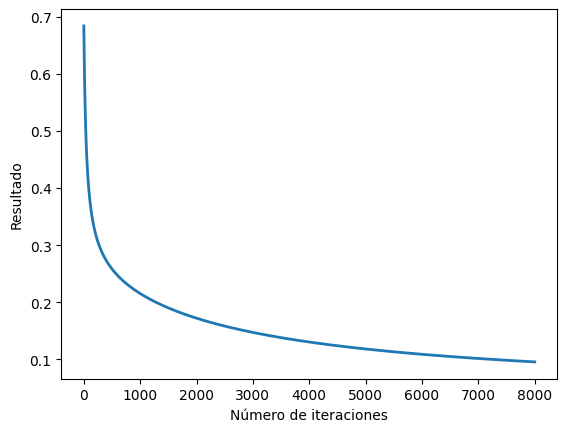

In [54]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha_reg = 0.03
num_iters = 8000   # <-- 2 min aprox en ejecutarse
lambda_reg = 0.01

# Inicializa theta_reg y ejecuta el descenso por el gradiente
theta_reg = np.zeros(15)
theta_reg, J_history_reg = descensoGradienteReg(theta_reg, X_ready, y_train, alpha_reg, num_iters, lambda_reg)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente: {:s}'.format(str(theta_reg)))
print('=' * 100)
#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_history_reg[-1]} ")

print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado de los partidos
plt.plot(np.arange(len(J_history_reg)), J_history_reg, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')

In [55]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array = [1, 4302,	2022,	113.0,	0.441,	0.909,	0.297,	27.0,	49.0,	93.0,	0.392,	0.735,	0.261,	15.0,	46.0]
resultado = sigmoid(np.dot(X_array, theta_reg))

print(f"El equipo de la NBA con las siguientes datos: {X_array}")
print('El equipo tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resultado))

El equipo de la NBA con las siguientes datos: [1, 4302, 2022, 113.0, 0.441, 0.909, 0.297, 27.0, 49.0, 93.0, 0.392, 0.735, 0.261, 15.0, 46.0]
El equipo tiene como probabilidad de ganar el partido de local: 1


## Validaciones con datos de Entrenamiento

Para las validaciones correspondientes se usara el 80% separado anteriormente para la fase de entrenamiento.

In [56]:
# Calculamos las predicciones en el conjunto de entrenamiento
y_train_pred = sigmoid(np.dot(X_ready, theta_reg))

# Usamos el umbral donde todo valor mayor o igual a 0.5 se considera como 1, de lo contrario, como 0
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)

# Mostramos la comparación entre las predicciones y los valores reales en el conjunto de entrenamiento
print("{:>10s}{:>10s}{:>10s}".format('Y_predicha', 'Y_umbral', 'Y_train'))
print("=" * 30)
for i in range(20):
    print('{:10.3f}{:10.0f}{:10.0f}'.format(y_train_pred[i], y_train_pred_binary[i], y_train.iloc[i]))

# Mostramos la precisión en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento: {:.2f}%".format(np.mean(y_train_pred_binary == y_train) * 100))

Y_predicha  Y_umbral   Y_train
     0.997         1         1
     0.938         1         1
     1.000         1         1
     0.730         1         1
     0.226         0         0
     1.000         1         1
     0.010         0         0
     0.008         0         0
     0.997         1         1
     0.999         1         1
     0.999         1         1
     0.999         1         1
     0.002         0         0
     1.000         1         1
     0.355         0         0
     0.025         0         0
     0.976         1         1
     0.000         0         0
     0.047         0         0
     0.559         1         1
Precisión en el conjunto de entrenamiento: 98.25%


## Validaciones con datos de prueba

Para las validaciones correspondientes se usara el 20% separado anteriormente para la fase de prueba.

In [57]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

#agregamos la columna de ones
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready)

[[ 1.         -0.74447053 -0.73616252 ...  0.78593128 -0.29398837
  -0.9479691 ]
 [ 1.          0.12510739  0.15813861 ... -0.44877253 -0.48807679
   0.12926781]
 [ 1.         -0.93547142 -0.91502274 ...  0.20059021  1.06463057
  -0.48629614]
 ...
 [ 1.         -0.97012559 -0.91502274 ... -0.3756049  -0.29398837
  -1.40964207]
 [ 1.         -0.22626978 -0.19958184 ...  0.07254686  0.28827689
  -0.02462318]
 [ 1.          1.26547139  1.23129997 ...  0.53899052  1.84098425
   1.05261373]]


### Calculamos la precisión del modelo

Calculamos con el metodo np.mean

Se calcula las predicciones del modelo para el conjunto de prueba X_test_ready,

se aplica un umbral para convertir las probabilidades en etiquetas binarias y luego imprime una muestra de las predicciones junto con las etiquetas reales. Esto te permite visualizar cómo se comparan las predicciones del modelo con los valores reales del conjunto de prueba.

In [58]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta_reg)))


y_predicha = np.array(y_predicha)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

print("{:>10s}{:>10s}{:>10s}".format(' Y_predicha', 'Y_umbral', ' Y_test_result'))

print("=" * 100)

for i in range(20):
    print('{:10.3f}{:10.0f}{:10.0f}'.format(y_predicha[i], y_umbral[i], y_test.iloc[i]))

#Mostramos la precisión del modelo
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test) * 100))

 Y_predicha  Y_umbral Y_test_result
     0.015         0         0
     0.014         0         0
     0.998         1         1
     0.999         1         1
     0.976         1         1
     1.000         1         1
     0.988         1         1
     0.997         1         1
     0.000         0         0
     0.021         0         0
     0.006         0         0
     0.999         1         1
     0.979         1         1
     1.000         1         1
     1.000         1         1
     0.764         1         0
     0.905         1         1
     0.546         1         1
     0.098         0         0
     0.325         0         0
Precición de entrenamiento: 97.99 % 
